# Burger's equation using numpy

The Burgers' equation in this code is a type of hyperbolic conservation law. It is a nonlinear partial differential equation that arises in fluid dynamics and has wave-like behavior. The equation describes the time evolution of the velocity field in a fluid that is undergoing viscous dissipation. The equation describes the evolution of a fluid velocity field u(x, t) over time t and space x, and is given by:

∂u/∂t + u∂u/∂x = ν∂^2u/∂x^2

where ν is the viscosity parameter.

The code defines the Burgers' equation in the function burgers_eqn, and uses the scipy.integrate.solve_ivp function to solve the equation numerically for a given initial condition u0 and time span t_span. The solution is stored in the variable sol, which contains the velocity field u(x,t) at each time step.The numerical method used to solve the Burgers' equation in the provided code is the Backward Differentiation Formula (BDF) method, which is a popular method for stiff systems of ordinary differential equations. The BDF method is implemented in the solve_ivp function in SciPy by setting the method argument to 'BDF'

The code then plots the solution using matplotlib.pyplot.plot, showing the velocity field u(x,1) at the final time step.

Total time of run: 0.0077898502349853516
Total time of run: 0.0
Total time of run: 0.017071008682250977
Total time of run: 0.0047533512115478516
Total time of run: 0.003989219665527344


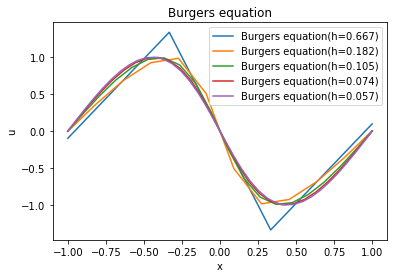

In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time
plt.figure()
# Define the Burgers equation
for i in range(1,10,2):
    s = time.time()
    def burgers_eqn(t, u, nu):
        # Compute the derivative
        dudt = -u*np.gradient(u) + nu*np.gradient(np.gradient(u))
        return dudt

    # Define the initial condition
    x = np.linspace(-1, 1, 4*i)
    u0 = -np.sin(np.pi*x)

    # Define the time span
    t_span = (0, 1)

    # Define the viscosity parameter
    nu = 0.1

    # Solve the equation using solve_ivp
    sol = solve_ivp(burgers_eqn, t_span, u0, method='BDF', args=(nu,))
    e = time.time()
    print('Total time of run:',e - s)
    # Plot the solution
    plt.plot(x, sol.y[:, -1],label ="Burgers equation(h={})".format(round(x[1]-x[0],3)))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title("Burgers equation")
    plt.legend()
    #plt.show()


Total time of run: 3.4190707206726074


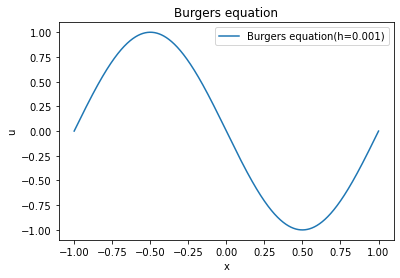

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time
plt.figure()
# Define the Burgers equation
for i in range(1,2):
    s = time.time()
    def burgers_eqn(t, u, nu):
        # Compute the derivative
        dudt = -u*np.gradient(u) + nu*np.gradient(np.gradient(u))
        return dudt

    # Define the initial condition
    x = np.linspace(-1, 1, 4000*i)
    u0 = -np.sin(np.pi*x)

    # Define the time span
    t_span = (0, 1)

    # Define the viscosity parameter
    nu = 0.1

    # Solve the equation using solve_ivp
    sol = solve_ivp(burgers_eqn, t_span, u0, method='BDF', args=(nu,))
    e = time.time()
    print('Total time of run:',e - s)
    # Plot the solution
    plt.plot(x, sol.y[:, -1],label ="Burgers equation(h={})".format(round(x[1]-x[0],3)))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title("Burgers equation")
    plt.legend()
    #plt.show()


# Burger's equation by DEEPxde

This code solves the one-dimensional Burgers' equation using the physics-informed neural network (PINN) method. PINN is a machine learning approach that uses the governing partial differential equation (PDE) as a constraint to learn the unknown function from data. 

where u(x,t) is the velocity of the fluid, t is time, x is the spatial coordinate, and ν is the viscosity parameter. The goal is to solve for the velocity u(x,t) given the initial condition and boundary conditions.

The PINN method approximates the solution u(x,t) using a neural network. The neural network takes in the spatial and temporal coordinates (x,t) as input and outputs the predicted velocity u(x,t). The PINN method enforces the PDE constraint using automatic differentiation to compute the gradients and Hessians of the predicted solution, which are then used to compute the residual of the PDE.

The code defines the PINN model using the DeepXDE library, which provides a high-level interface for solving PDEs using deep learning. The model is trained using the Adam optimizer and L-BFGS optimizer with a mean squared error (MSE) loss function. The training data is generated using the exact solution of the Burgers' equation and the initial and boundary conditions. The trained model is then used to predict the velocity of the fluid at different times and locations.

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...


C:\Users\mayur\anaconda3\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.710856 s

'compile' took 6.009794 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.58e-03, 4.60e-02, 3.66e-01]    [7.58e-03, 4.60e-02, 3.66e-01]    []  
1000      [3.91e-02, 2.35e-04, 4.90e-02]    [3.91e-02, 2.35e-04, 4.90e-02]    []  
2000      [2.89e-02, 6.77e-05, 4.12e-02]    [2.89e-02, 6.77e-05, 4.12e-02]    []  
3000      [9.91e-03, 1.06e-04, 8.97e-03]    [9.91e-03, 1.06e-04, 8.97e-03]    []  
4000      [3.86e-03, 3.01e-05, 2.90e-03]    [3.86e-03, 3.01e-05, 2.90e-03]    []  
5000      [2.38e-03, 1.67e-05, 1.51e-03]    [2.38e-03, 1.67e-05, 1.51e-03]    []  
6000      [1.75e-03, 7.31e-06, 1.03e-03]    [1.75e-03, 7.31e-06, 1.03e-03]    []  
7000      [1.37e-03, 2.55e-06, 8.40e-04]    [1.37e-03, 2.55e-06, 8.40e-04]    []  
8000      [1.12e-03, 1.97e-06, 7.06e-04]    [1.12e-03, 1.97e-06, 7.06e-04]    []  
9000      [9.03e-04, 1.76e-06, 5.76e-04]    [9.03e-04, 1.76e-06, 5

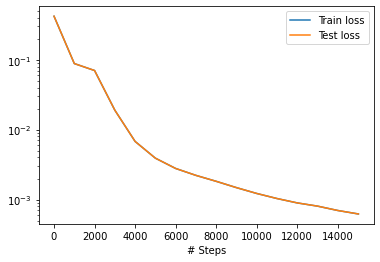

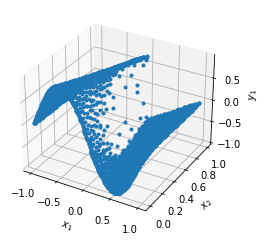

Mean residual: 0.015031358
L2 relative error: 0.025638758070240762
Total time of run: 323.75229358673096


In [3]:
import deepxde as dde
import numpy as np
import time
s = time.time()

def gen_testdata():
    data = np.load(r"C:\Users\mayur\Downloads\Burgers.npz")
    t, x, exact = data["t"], data["x"], data["usol"].T
    xx, tt = np.meshgrid(x, t)
    X = np.vstack((np.ravel(xx), np.ravel(tt))).T
    y = exact.flatten()[:, None]
    return X, y


def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t + y * dy_x - 0.01 / np.pi * dy_xx


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 0.99)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(
    geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial
)

data = dde.data.TimePDE(
    geomtime, pde, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160
)
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)

model.compile("adam", lr=1e-3)
model.train(iterations=15000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

X, y_true = gen_testdata()
y_pred = model.predict(X)
f = model.predict(X, operator=pde)
print("Mean residual:", np.mean(np.absolute(f)))
print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))
np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))
e = time.time()
print('Total time of run:',e - s)